In [5]:
import torch
import numpy as np

In [6]:
# !pip install torch

In [ ]:
# numpy array 和 torch 的自由转换

In [44]:
np_data = np.arange(6).reshape((2, 3))
torch_data = torch.from_numpy(np_data)
tensor2array = torch_data.numpy()
print(
    '\nnumpy array:', np_data,          # [[0 1 2], [3 4 5]]
    '\ntorch tensor:', torch_data,      #  0  1  2 \n 3  4  5    [torch.LongTensor of size 2x3]
    '\ntensor to array:', tensor2array, # [[0 1 2], [3 4 5]]
)


numpy array: [[0 1 2]
 [3 4 5]] 
torch tensor: tensor([[0, 1, 2],
        [3, 4, 5]]) 
tensor to array: [[0 1 2]
 [3 4 5]]


In [4]:
# Torch 中的数学运算

In [45]:
# abs 绝对值计算
data = [-1, -2, 1, 2]
tensor = torch.FloatTensor(data)  # 转换成32位浮点 tensor
print(
    '\nabs',
    '\nnumpy: ', np.abs(data),          # [1 2 1 2]
    '\ntorch: ', torch.abs(tensor)      # [1 2 1 2]
)

# sin   三角函数 sin
print(
    '\nsin',
    '\nnumpy: ', np.sin(data),      # [-0.84147098 -0.90929743  0.84147098  0.90929743]
    '\ntorch: ', torch.sin(tensor)  # [-0.8415 -0.9093  0.8415  0.9093]
)

# mean  均值
print(
    '\nmean',
    '\nnumpy: ', np.mean(data),         # 0.0
    '\ntorch: ', torch.mean(tensor)     # 0.0
)


abs 
numpy:  [1 2 1 2] 
torch:  tensor([1., 2., 1., 2.])

sin 
numpy:  [-0.84147098 -0.90929743  0.84147098  0.90929743] 
torch:  tensor([-0.8415, -0.9093,  0.8415,  0.9093])

mean 
numpy:  0.0 
torch:  tensor(0.)


In [12]:
# 变量Variable  Variable存放Torch的Tensor 篮子装鸡蛋 鸡蛋数-Tensor值会变

In [46]:
import torch
from torch.autograd import Variable # torch 中 Variable 模块

# 先生鸡蛋
tensor = torch.FloatTensor([[1,2],[3,4]])
# 把鸡蛋放到篮子里, requires_grad是参不参与误差反向传播, 要不要计算梯度
variable = Variable(tensor, requires_grad=True)

print(tensor)
"""
 1  2
 3  4
[torch.FloatTensor of size 2x2]
"""

print(variable)
"""
Variable containing:
 1  2
 3  4
[torch.FloatTensor of size 2x2]
"""

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


'\nVariable containing:\n 1  2\n 3  4\n[torch.FloatTensor of size 2x2]\n'

In [33]:
# Variable 计算，梯度

In [47]:
t_out = torch.mean(tensor*tensor)       # x^2
v_out = torch.mean(variable*variable)   # x^2
print(t_out)
print(v_out)    # 7.5

tensor(7.5000)
tensor(7.5000, grad_fn=<MeanBackward0>)


In [42]:
v_out.backward?

In [48]:
v_out.backward()    # 模拟 v_out 的误差反向传递

# 下面两步看不懂没关系, 只要知道 Variable 是计算图的一部分, 可以用来传递误差就好.
# v_out = 1/4 * sum(variable*variable) 这是计算图中的 v_out 计算步骤
# 针对于 v_out 的梯度就是, d(v_out)/d(variable) = 1/4*2*variable = variable/2

print(variable.grad)    # 初始 Variable 的梯度
'''
 0.5000  1.0000
 1.5000  2.0000
'''

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])


'\n 0.5000  1.0000\n 1.5000  2.0000\n'

### 获取 Variable 里面的数据
----------
直接print(variable)只会输出 Variable 形式的数据, 在很多时候是用不了的(比如想要用 plt 画图), 所以我们要转换一下, 将它变成 tensor 形式.


In [ ]:
print(variable)     #  Variable 形式
"""
Variable containing:
 1  2
 3  4
[torch.FloatTensor of size 2x2]
"""

print(variable.data)    # tensor 形式
"""
 1  2
 3  4
[torch.FloatTensor of size 2x2]
"""

print(variable.data.numpy())    # numpy 形式
"""
[[ 1.  2.]
 [ 3.  4.]]
"""

### Torch 中的激励函数
-----------
Torch 中的激励函数有很多, 不过我们平时要用到的就这几个. relu, sigmoid, tanh, softplus. 看一下样子

In [50]:
import torch
import torch.nn.functional as F     # 激励函数存在的库
from torch.autograd import Variable

# 做一些模拟数据来观看图像
x = torch.linspace(-5, 5, 200)  # x data (tensor), shape=(100, 1)
x = Variable(x)

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
# # python 的可视化模块, 我有教程 (https://morvanzhou.github.io/tutorials/data-manipulation/plt/)

In [57]:
x_np = x.data.numpy()   # 换成 numpy array, 出图时用

# 几种常用的激励函数
y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()
# y_softmax = F.softmax(x)  softmax 比较特殊, 不能直接显示, 不过他是关于概率的, 用于分类

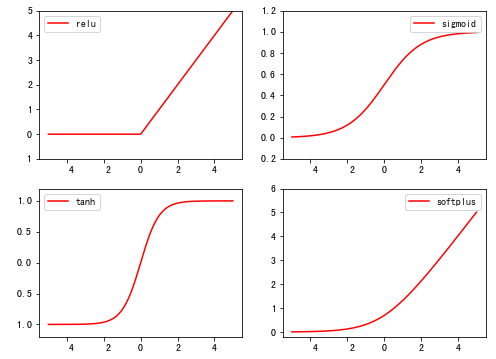

In [58]:
# 作图
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()